<a href="https://colab.research.google.com/github/sumaiyasiddiqa/Retail-sales-prediction/blob/main/Retail_Sales_Prediction_Sumaiya_Siddiqa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Retail Sales Prediction**

**Project Type- Regression**

**Contribution- Individual**

**Name- Sumaiya Siddiqa**


# **Problem Statement**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.


# **Data Description**

####Rossmann Stores Data.csv - Historical data including Sales.
#### store.csv  - Supplemental information about the stores.

### **Data Fields**

* **Id** - an Id that represents a (Store, Date) duple within the set
*  **Store** - a unique Id for each store
*  **Sales** - the turnover for any given day (Dependent Variable)
* **Customers** - the number of customers on a given day
* **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* **StoreType** - differentiates between 4 different store models: a, b, c, d
* **Assortment** - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
* **CompetitionDistance** - distance in meters to the nearest competitor store
* **CompetitionOpenSince**[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* **Promo** - indicates whether a store is running a promo on that day
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* **Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


In [2]:
#Importing important libraries and modules

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

# **Data Collecting And Preprocessing**

In [5]:
#reading the csv file and converting them to pandas dataframes
sales_df= pd.read_csv('/content/drive/MyDrive/CAPSTONE2(Retail Sales Prediction)/datsets/Rossmann Stores Data.csv')
store_df= pd.read_csv('/content/drive/MyDrive/CAPSTONE2(Retail Sales Prediction)/datsets/store.csv')


In [8]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
sales_df.tail()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [11]:
sales_df.shape

(1017209, 9)

In [13]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


 There are 1017209 rows and 9 columns in the sales dataset.

In [14]:
#Lets check the store dataset

store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [16]:
store_df.shape

(1115, 10)

In [17]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


The store dataset has 1115 rows and 10 features that means their are 1115 total stores. Also their are missing values in it.


# **Dealing With Missing Values**

### **Count missing values in each dataset**

In [19]:
#Lets check if there are any missing values in the sales dataset
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

There are no null values in the sales dataset.

In [20]:
#Lets check if there are any null values in the stores dataset
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

1. There are 3 null values in the CompetitionDistance column.The distribution plot can give us an idea about the distances at which generally the stores are opened and we can input the appropriate values in the place of null values.

2. Both the CompetitionOpenSinceYear and CompetitionOpenSinceMonth columns have 354 null values. We can replace the missing values with the mode of the column as it will give the most occuring month and year of the respective columns.

3. Promo2SinceWeek, Promo2SinceYear, PromoInterval are null values where Promo2 is 0 as we can see in the dataset. So, we can replace the null values with 0 in all the columns.

### **Handling missing values**

Text(0.5, 0, 'Competition Distance Distribution Plot')

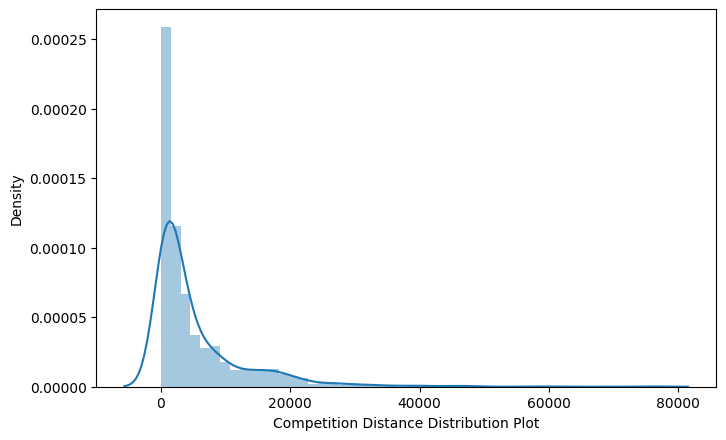

In [22]:
#Lets check the distribution plot of the competion distance
sns.distplot(x=store_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

From the above distribution we can see that most of the values are towards the left and the distribution is skewed on the right. So median is more robust to outliers.

In [23]:
#Replacing the null values in CompetitionDistance colummn with the median
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

In [27]:
#Replacing the null values in CompetitionOpenSinceYear and CompetitionOpenSinceMonth columns with the mode 
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace=True)
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)


In [30]:
#Replacing the null values in the promo2 related columns
store_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
store_df['Promo2SinceYear'].fillna(value=0,inplace=True)
store_df['PromoInterval'].fillna(value=0,inplace=True)
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,9.0,2013.0,0,0.0,0.0,0
1113,1114,a,c,870.0,9.0,2013.0,0,0.0,0.0,0
1114,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [31]:
#Check if we have handled all the null values
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

We have successfully handled all the null values in the stores dataset.

# **Date Extraction**

In [33]:
#First convert the 'Date' column in the sales dataset to datetime datatype
sales_df['Date']=pd.to_datetime(sales_df['Date'])
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [38]:
#Now extract the month, year, day and week of the year from the 'Date' column
sales_df['Year'] =pd.DatetimeIndex(sales_df['Date']).year
sales_df['Month'] =pd.DatetimeIndex(sales_df['Date']).month
sales_df['Day'] =pd.DatetimeIndex(sales_df['Date']).day
sales_df['WeekOfYear'] = pd.DatetimeIndex(sales_df['Date']).weekofyear
sales_df=sales_df.reset_index()
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 15 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   level_0        1017209 non-null  int64         
 1   index          1017209 non-null  int64         
 2   Store          1017209 non-null  int64         
 3   DayOfWeek      1017209 non-null  int64         
 4   Date           1017209 non-null  datetime64[ns]
 5   Sales          1017209 non-null  int64         
 6   Customers      1017209 non-null  int64         
 7   Open           1017209 non-null  int64         
 8   Promo          1017209 non-null  int64         
 9   StateHoliday   1017209 non-null  object        
 10  SchoolHoliday  1017209 non-null  int64         
 11  Year           1017209 non-null  int64         
 12  Month          1017209 non-null  int64         
 13  Day            1017209 non-null  int64         
 14  WeekOfYear     1017209 non-null  i

# **Merging the two datasets**

In [40]:
#merging the datasets on the stores data
df = sales_df.merge(right=store_df, on="Store", how="left")

In [41]:
#First five rows of the merged dataset
df.head()

,level_0,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,0,1,5,2015-07-31,5263,555,1,1,0,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,1,2,5,2015-07-31,6064,625,1,1,0,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2,2,3,5,2015-07-31,8314,821,1,1,0,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,3,3,4,5,2015-07-31,13995,1498,1,1,0,...,31,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,4,4,5,5,2015-07-31,4822,559,1,1,0,...,31,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [43]:
df.shape

(1017209, 24)

## **Unique Values In The Categorical Features**

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   level_0                    1017209 non-null  int64         
 1   index                      1017209 non-null  int64         
 2   Store                      1017209 non-null  int64         
 3   DayOfWeek                  1017209 non-null  int64         
 4   Date                       1017209 non-null  datetime64[ns]
 5   Sales                      1017209 non-null  int64         
 6   Customers                  1017209 non-null  int64         
 7   Open                       1017209 non-null  int64         
 8   Promo                      1017209 non-null  int64         
 9   StateHoliday               1017209 non-null  object        
 10  SchoolHoliday              1017209 non-null  int64         
 11  Year                       1017209 no

In [45]:
#creating a categorical column list 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [46]:
#checking the unique values involved and if all the values are in appropriate datatypes
for col in categorical_variables:
  print(f'Unique values for {col}: {df[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [47]:
#change into int type
df['StateHoliday'].replace({'0':0}, inplace=True)

# **Exploratory Data Analysis**

# **Sales**

Text(0.5, 1.0, 'Plot between Competition Open Since year and Sales')

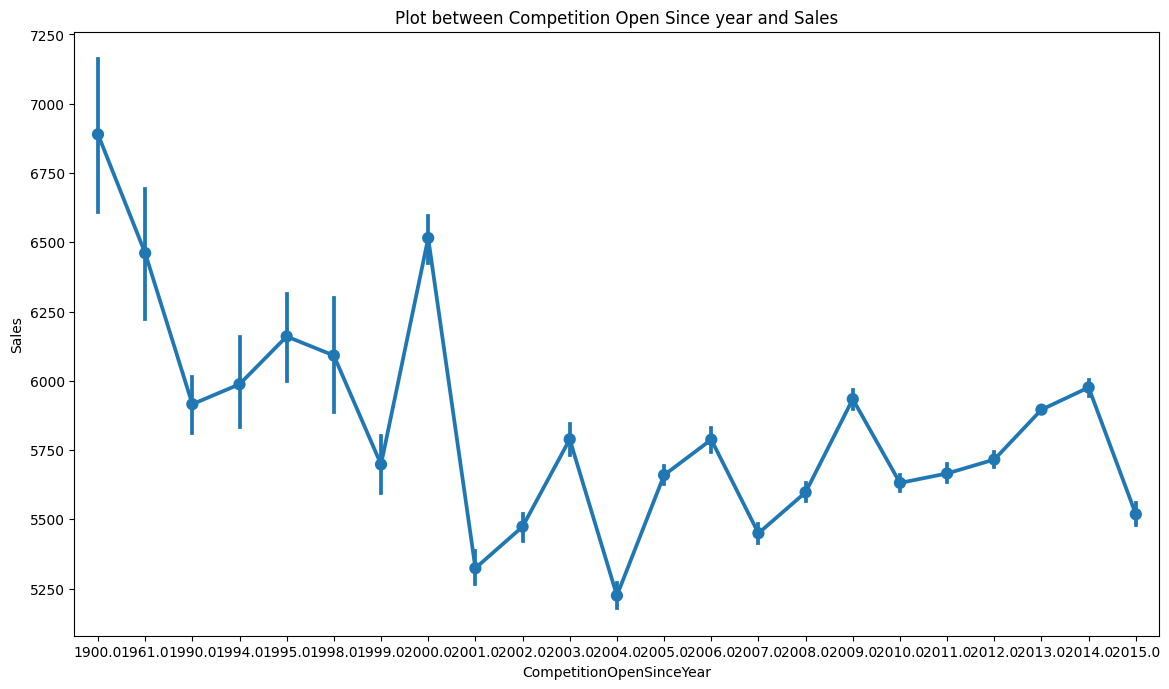

In [53]:
plt.figure(figsize=(14,8))
sns.pointplot(x = 'CompetitionOpenSinceYear', y='Sales', data=df)
plt.title('Plot between Competition Open Since year and Sales')

From the plot we can tell that sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales